In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

import nltk
from nltk.util import pr
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import re
import string

In [ ]:

data = pd.read_csv('/train.csv')
data['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [ ]:
data

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
data.shape

(24783, 6)

In [ ]:
#assigning labels
data["labels"] = data["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})


In [ ]:
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [ ]:
data = data[["tweet", "labels"]]
data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [ ]:
import pandas as pd

df1= pd.read_parquet("hf://datasets/ucberkeley-dlab/measuring-hate-speech/measuring-hate-speech.parquet")
df2=df1['text']




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
print(len(df2))
print(df1.shape)

135556
(135556, 131)


In [ ]:
df3=pd.DataFrame(["Hate Speech" for i in range(len(df2))],columns=['class'])
hate=pd.concat([df2,df3],axis=1,ignore_index=True)
hate

,0,1
0,Yes indeed. She sort of reminds me of the elde...,Hate Speech
1,The trans women reading this tweet right now i...,Hate Speech
2,Question: These 4 broads who criticize America...,Hate Speech
3,It is about time for all illegals to go back t...,Hate Speech
4,For starters bend over the one in pink and kic...,Hate Speech
...,...,...
135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,Hate Speech
135552,Millions of #Yemen-is participated in mass ral...,Hate Speech
135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,Hate Speech
135554,Millions of #Yemen-is participated in mass ral...,Hate Speech


In [ ]:
hate.rename(columns={0:"tweet",1:'labels'},inplace=True)
hate

,tweet,labels
0,Yes indeed. She sort of reminds me of the elde...,Hate Speech
1,The trans women reading this tweet right now i...,Hate Speech
2,Question: These 4 broads who criticize America...,Hate Speech
3,It is about time for all illegals to go back t...,Hate Speech
4,For starters bend over the one in pink and kic...,Hate Speech
...,...,...
135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,Hate Speech
135552,Millions of #Yemen-is participated in mass ral...,Hate Speech
135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,Hate Speech
135554,Millions of #Yemen-is participated in mass ral...,Hate Speech


In [ ]:
hate=hate.iloc[:14000]
hate

,tweet,labels
0,Yes indeed. She sort of reminds me of the elde...,Hate Speech
1,The trans women reading this tweet right now i...,Hate Speech
2,Question: These 4 broads who criticize America...,Hate Speech
3,It is about time for all illegals to go back t...,Hate Speech
4,For starters bend over the one in pink and kic...,Hate Speech
...,...,...
13995,You fuck like a woman but you love like a litt...,Hate Speech
13996,I feel ya. For me I've been trying to get into...,Hate Speech
13997,WHO TOLD YOU THAT LIE....BIG U WAS THERE WITH ...,Hate Speech
13998,"Do you also criticize Christians who don't ""su...",Hate Speech


In [ ]:
final_df=pd.concat([data,hate], ignore_index=True)
# final_df = pd.merge(data, hate, on='key', how='inner')
final_df
# final_df['labels'].value_counts()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
38778,You fuck like a woman but you love like a litt...,Hate Speech
38779,I feel ya. For me I've been trying to get into...,Hate Speech
38780,WHO TOLD YOU THAT LIE....BIG U WAS THERE WITH ...,Hate Speech
38781,"Do you also criticize Christians who don't ""su...",Hate Speech


In [ ]:
import pandas as pd

df = pd.read_csv("hf://datasets/contemmcm/sentiment140/polarity.csv")


In [ ]:
df['label'].value_counts()

,count
label,
1,800000
0,800000


In [ ]:
df_neutral = df[df['label'] == 1]
df_neutral_reset = df_neutral.reset_index(drop=True)
df_neutral_reset=df_neutral_reset.iloc[:10000]
df_neutral_reset


,label,text
0,1,Just back home from a little gathering with so...
1,1,watching the holiday .. relaxing
2,1,he has a hoodie on cause i have the ac on lol ...
3,1,Good morning!Got to work some school stuffs w/...
4,1,"got the best addon for twitter, IF YOU USE FIR..."
...,...,...
9995,1,@swiffmusic make me..
9996,1,"Ha, wanna hit up b-ville next friday??? Imma b..."
9997,1,"My and my sister are AWESOME! Oprah, bring us ..."
9998,1,@Poetic_line yup! its nice to find you and i'...


In [ ]:
df_neutral_reset['label'] = df_neutral_reset['label'].replace(1, 'No Hate and Offensive')
df_neutral_reset


,label,text
0,No Hate and Offensive,Just back home from a little gathering with so...
1,No Hate and Offensive,watching the holiday .. relaxing
2,No Hate and Offensive,he has a hoodie on cause i have the ac on lol ...
3,No Hate and Offensive,Good morning!Got to work some school stuffs w/...
4,No Hate and Offensive,"got the best addon for twitter, IF YOU USE FIR..."
...,...,...
9995,No Hate and Offensive,@swiffmusic make me..
9996,No Hate and Offensive,"Ha, wanna hit up b-ville next friday??? Imma b..."
9997,No Hate and Offensive,"My and my sister are AWESOME! Oprah, bring us ..."
9998,No Hate and Offensive,@Poetic_line yup! its nice to find you and i'...


In [ ]:

df_neutral_reset.rename(columns={'label': 'labels', 'text': 'tweet'}, inplace=True)
df_neutral_reset


,labels,tweet
0,No Hate and Offensive,Just back home from a little gathering with so...
1,No Hate and Offensive,watching the holiday .. relaxing
2,No Hate and Offensive,he has a hoodie on cause i have the ac on lol ...
3,No Hate and Offensive,Good morning!Got to work some school stuffs w/...
4,No Hate and Offensive,"got the best addon for twitter, IF YOU USE FIR..."
...,...,...
9995,No Hate and Offensive,@swiffmusic make me..
9996,No Hate and Offensive,"Ha, wanna hit up b-ville next friday??? Imma b..."
9997,No Hate and Offensive,"My and my sister are AWESOME! Oprah, bring us ..."
9998,No Hate and Offensive,@Poetic_line yup! its nice to find you and i'...


In [ ]:

final_df = pd.concat([final_df, df_neutral_reset], ignore_index=True)
final_df

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
48778,@swiffmusic make me..,No Hate and Offensive
48779,"Ha, wanna hit up b-ville next friday??? Imma b...",No Hate and Offensive
48780,"My and my sister are AWESOME! Oprah, bring us ...",No Hate and Offensive
48781,@Poetic_line yup! its nice to find you and i'...,No Hate and Offensive


In [ ]:
final_df['labels'].value_counts()

,count
labels,
Offensive Language,19190
Hate Speech,15430
No Hate and Offensive,14163


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    #text=re.sub(r'\b(rt)\b', '', text,regex=True) #change
    tweet_tokens = word_tokenize(text)
    # filtered_tweets=[w for w in tweet_tokens if not w in stopword] #removing stopwords
    return " ".join(tweet_tokens)

In [ ]:
final_df['labels'].value_counts()

,count
labels,
Offensive Language,19190
Hate Speech,15430
No Hate and Offensive,14163


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
final_df.tweet=final_df['tweet'].apply(clean)

In [ ]:
tweetData = final_df.drop_duplicates("tweet")

In [ ]:
tweetData.shape

(48440, 2)

In [ ]:
tweetData.isnull().sum()

,0
tweet,0
labels,0


In [ ]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(data):
    tweet=[lemmatizer.lemmatize(word) for word in data]
    return data

In [ ]:
tweetData.loc[:, 'tweet']=tweetData['tweet'].apply(lambda x: lemmatizing(x))

In [ ]:
tweetData['labels'].value_counts()

,count
labels,
Offensive Language,19075
Hate Speech,15277
No Hate and Offensive,14088


<ipython-input-37-69a7d2290c67>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


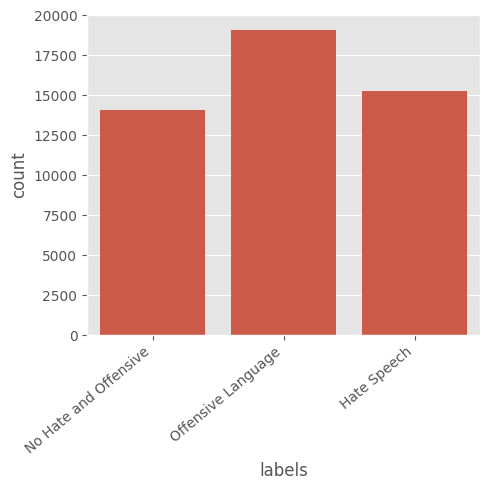

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='labels', data=tweetData)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

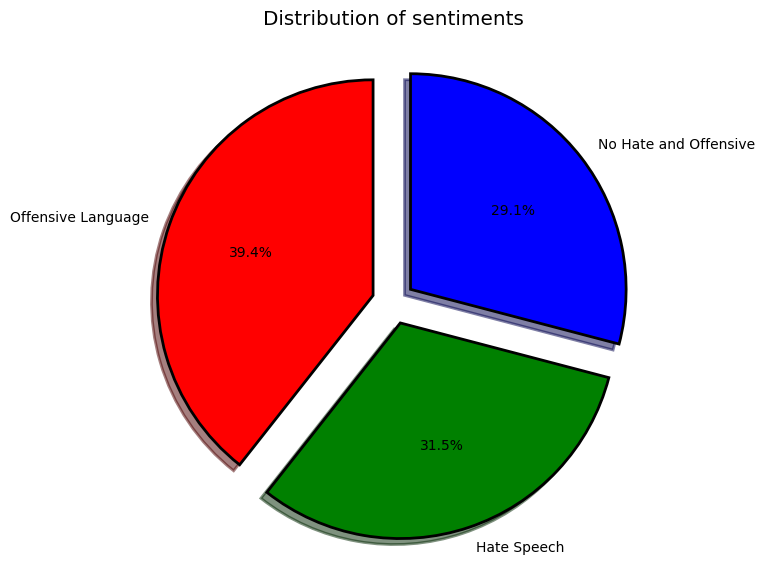

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':2, "edgecolor":'black'}
tags = tweetData['labels'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")


In [ ]:
non_hate_tweets = tweetData[tweetData.labels=='No Hate and Offensive']
non_hate_tweets.head()

,tweet,labels
0,rt mayasolovely as a woman you shouldnt compla...,No Hate and Offensive
40,momma said no pussy cats inside my doghouse,No Hate and Offensive
63,simplyaddictedtoguys woof woof hot scally lad,No Hate and Offensive
66,allaboutmanfeet woof woof and hot soles,No Hate and Offensive
67,allyhaaaaa lemmie eat a oreo amp do these dish...,No Hate and Offensive


In [ ]:
#td-idf bigram
vect=TfidfVectorizer(ngram_range=(1,2)).fit(tweetData['tweet'])

In [ ]:
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 200 features: \n", format(feature_names[:20]))

Number of features: {}
 371404
First 200 features: 
 ['aa' 'aa classes' 'aa jata' 'aa lol' 'aa love' 'aa needs' 'aa suck'
 'aa yaynay' 'aaaaaaaaaaahhhhhhhhhhhhhhh' 'aaaaaaaaand'
 'aaaaaaaaand begins' 'aaaaaah' 'aaaaaah cant' 'aaaaah' 'aaaaah beautiful'
 'aaaaah jonasparanoid' 'aaaaaw' 'aaaaaw adorable' 'aaaaay'
 'aaaaay ginger']


In [ ]:
#tf-idf trigram
vect=TfidfVectorizer(ngram_range=(1,3)).fit(tweetData['tweet'])

In [ ]:
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 200 features: \n", format(feature_names[:20]))

Number of features: {}
 732767
First 200 features: 
 ['aa' 'aa classes' 'aa classes bc' 'aa jata' 'aa jata hai' 'aa lol'
 'aa lol gduenez' 'aa love' 'aa needs' 'aa needs loose' 'aa suck'
 'aa suck small' 'aa yaynay' 'aa yaynay like' 'aaaaaaaaaaahhhhhhhhhhhhhhh'
 'aaaaaaaaand' 'aaaaaaaaand begins' 'aaaaaaaaand begins rt' 'aaaaaah'
 'aaaaaah cant']


In [ ]:
tweetData.shape

(48277, 2)

In [ ]:
#separating the data into x and y
from sklearn.model_selection import StratifiedKFold
X = tweetData['tweet']
Y = tweetData['labels']
X = vect.transform(X)
# cv = StratifiedKFold(n_splits=5)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (33796, 732767)
Size of Y_train (33796,)
Size of X_test (14484, 732767)
Size of Y_test (14484,)


In [ ]:

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)

svm_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, svm_pred)
print("Test accuracy:", accuracy)

In [ ]:
# Confusion matrix
cm = confusion_matrix(Y_test, svm_pred)
print(cm)

labels = ['Hate Speech', 'No Hate and no Offensive', 'Offensive Language']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()

In [ ]:

print(classification_report(Y_test, svm_pred))


In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, Y_test)

In [ ]:
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

In [ ]:

cm = confusion_matrix(Y_test, dtree_pred)
print(cm)
labels = ['Hate Speech', 'No Hate and no Offensive', 'Offensive Language']

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")
plt.xticks(ticks=[0,1,2], labels=labels, rotation=45)
plt.show()


In [ ]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train, Y_train)
# Predict on the test data
rfc_pred = rfc.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, rfc_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8628831814415907


[[3496  427  670]
 [ 138 3904  211]
 [ 229  311 5098]]


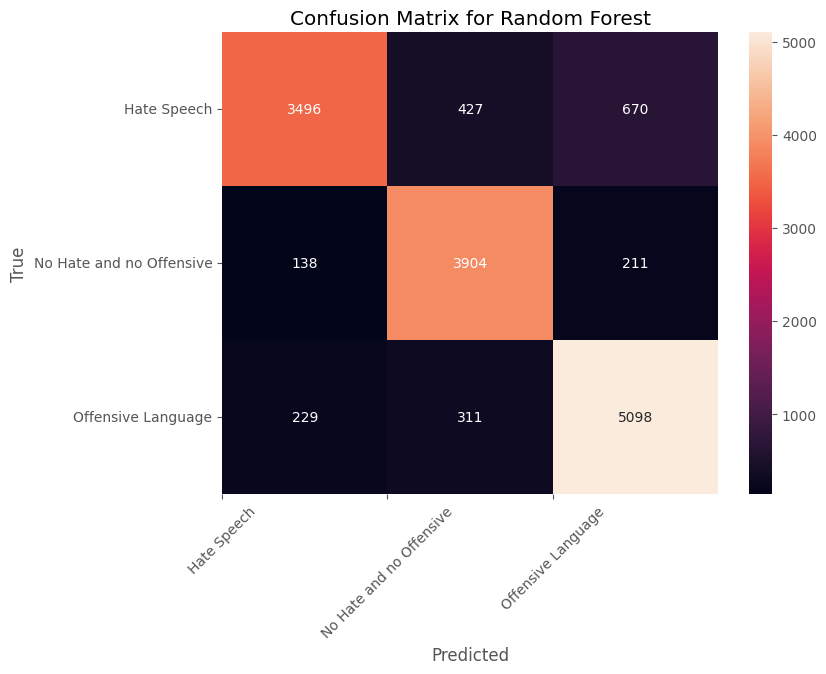

In [ ]:

# Confusion matrix
cm = confusion_matrix(Y_test, rfc_pred)
print(cm)

labels = ['Hate Speech', 'No Hate and no Offensive', 'Offensive Language']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()


Test accuracy: 0.7975006904170119
[[2615 1430  548]
 [ 147 4038   68]
 [ 369  371 4898]]


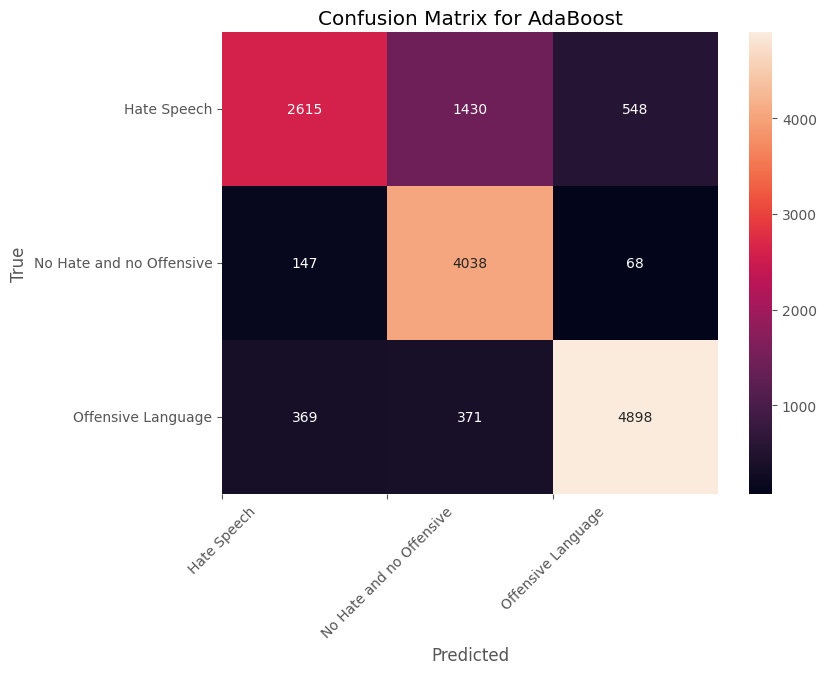

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust n_estimators

ada.fit(X_train, Y_train)

ada_pred = ada.predict(X_test)

accuracy = accuracy_score(Y_test, ada_pred)
print("Test accuracy:", accuracy)

cm = confusion_matrix(Y_test, ada_pred)
print(cm)

labels = ['Hate Speech', 'No Hate and no Offensive', 'Offensive Language']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for AdaBoost")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()


In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
!pip install xgboost
from xgboost import XGBClassifier
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
xgb = XGBClassifier()

xgb.fit(X_train, Y_train_encoded)

Y_test_encoded = le.transform(Y_test)
xgb_pred = xgb.predict(X_test)
accuracy = accuracy_score(Y_test_encoded, xgb_pred)
print("Test accuracy:", accuracy)


In [ ]:

cm = confusion_matrix(Y_test_encoded, xgb_pred)
print(cm)

labels = le.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for XGBoost")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#hyper parameter tuning rfc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rfc, param_grid, cv=5)
grid.fit(X_train, Y_train)

print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

rfc_hyper_pred = grid.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, rfc_hyper_pred)
print("Test accuracy:", accuracy)

In [ ]:
#hyper parameter for svc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, Y_train)

print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

svm_hyper_pred = grid.predict(X_test)
accuracy = accuracy_score(Y_test, svm_hyper_pred)
print("Test accuracy:", accuracy)

#for visualizing confusion matrix
style.use('classic')
cm = confusion_matrix(Y_test, svm_hyper_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()

In [ ]:
#ensemble modelling
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

estimators = [
    ('xgboost', XGBClassifier()),
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC())
]

ensemble = VotingClassifier(estimators)

ensemble.fit(X_train, Y_train)

ensemble_predictions = ensemble.predict(X_test)

Test accuracy: 0.8741369787351561
[[3622  463  508]
 [ 158 4039   56]
 [ 367  271 5000]]


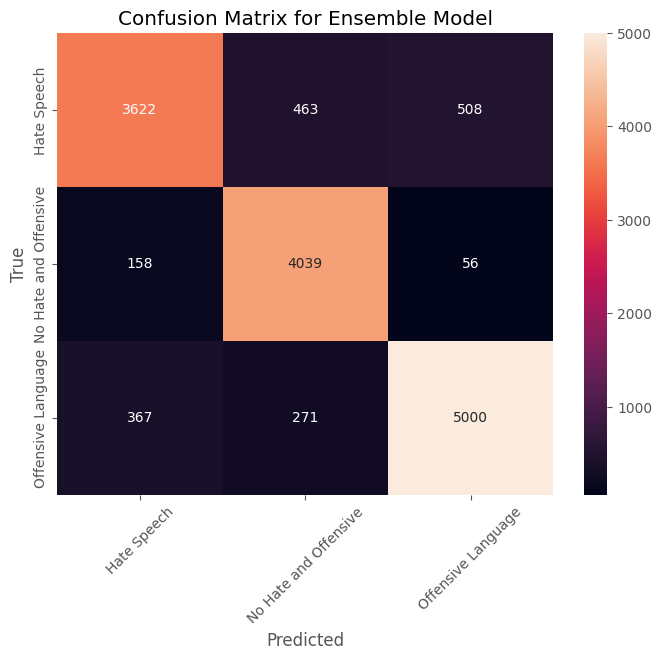

                       precision    recall  f1-score   support

          Hate Speech       0.87      0.79      0.83      4593
No Hate and Offensive       0.85      0.95      0.89      4253
   Offensive Language       0.90      0.89      0.89      5638

             accuracy                           0.87     14484
            macro avg       0.87      0.88      0.87     14484
         weighted avg       0.88      0.87      0.87     14484



In [ ]:

accuracy = accuracy_score(Y_test, ensemble_predictions)
print("Test accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(Y_test, ensemble_predictions)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=ensemble.classes_, yticklabels=ensemble.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Ensemble Model")
plt.xticks(rotation=45)
plt.show()

# Classification report
print(classification_report(Y_test, ensemble_predictions))


In [ ]:

def predict_sentence(sentence, model, vectorizer):

  cleaned_sentence = clean(sentence)
  lemmatized_sentence = lemmatizing(cleaned_sentence)
  vectorized_sentence = vectorizer.transform([lemmatized_sentence])

  prediction = model.predict(vectorized_sentence)

  return prediction[0]

sentence = "why these blacks live with us"
prediction = predict_sentence(sentence, ensemble, vect)
print(f"Predicted sentiment: {prediction}")


In [ ]:
!pip install tensorflow

In [ ]:
!pip show tensorflow
!pip show keras

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
Name: keras
Version: 3.4.1
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from gensim.models import KeyedVectors

In [ ]:
new_data=pd.read_csv('/content/new_df.csv')

In [ ]:
new_data['labels'].value_counts()

,count
labels,
Offensive Language,19075
Hate Speech,15277
No Hate and Offensive,14088


In [ ]:
texts = new_data['tweet'].astype(str).values


# Tokenize the text
max_vocab_size = 15000  # Maximum number of words to keep in the vocabulary
max_sequence_length = 100  # Maximum length of input sequences

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
# max_vocab_size=len(word_index)+1 #change

# Pad sequences to ensure uniform input size
X = pad_sequences(sequences, maxlen=max_sequence_length)

label_mapping = {'No Hate and Offensive': 2, 'Hate Speech': 0, 'Offensive Language': 1}  # Map string labels to integers
numerical_labels = np.array([label_mapping[label] for label in new_data['labels']])

# Convert labels to categorical (one-hot encoding)
y = to_categorical(numerical_labels,num_classes=3)  # Assuming 3 classes

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
import gensim.downloader as api
word2vec_path = api.load("word2vec-google-news-300", return_path=True)


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# Load pre-trained Word2Vec model
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Prepare embedding matrix
embedding_dim = 300
vocab_size = min(max_vocab_size, len(word_index) + 1)

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = word2vec.get_vector(word) if word in word2vec else None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.layers import Input,BatchNormalization
from tensorflow.keras import regularizers
model = Sequential()
model.add(Input(shape=(max_sequence_length,)))

# Embedding layer with pre-trained Word2Vec and trainable weights
model = Sequential()
model.add(Input(shape=(max_sequence_length,)))

# Embedding layer with pre-trained Word2Vec and trainable weights
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=True))

# Add spatial dropout for regularization
model.add(SpatialDropout1D(0.2))

# Bidirectional LSTM layers with reduced units
model.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)))

# Dense layer with L2 regularization and output
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 300)            │       4,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_4                  │ (None, 100, 300)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 100, 128)            │         186,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,732,707 (18.05 MB)

 Trainable params: 4,732,579 (18.05 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=64,  # Adjust based on hardware
                    epochs=10,  # Adjust based on performance
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 472s 748ms/step - accuracy: 0.6945 - loss: 1.1313 - val_accuracy: 0.8871 - val_loss: 0.3951 - learning_rate: 0.0010
Epoch 2/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 436s 640ms/step - accuracy: 0.8888 - loss: 0.3746 - val_accuracy: 0.8895 - val_loss: 0.3255 - learning_rate: 0.0010
Epoch 3/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 370s 611ms/step - accuracy: 0.9167 - loss: 0.2635 - val_accuracy: 0.8908 - val_loss: 0.3204 - learning_rate: 0.0010
Epoch 4/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 386s 618ms/step - accuracy: 0.9296 - loss: 0.2213 - val_accuracy: 0.8912 - val_loss: 0.3204 - learning_rate: 0.0010
Epoch 5/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 378s 625ms/step - accuracy: 0.9405 - loss: 0.1877 - val_accuracy: 0.8928 - val_loss: 0.3452 - learning_rate: 0.0010
Epoch 6/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 394s 644ms/step - accuracy: 0.9522 - loss: 0.1564 - val_accuracy: 0.8931 - val_loss: 0.3745 - learning_rate: 2.0000e-04


In [ ]:
# prompt: save the above bilstm trained model

model.save('/content/drive/MyDrive/bilstm_model.h5')

In [ ]:
# Evaluate on validation set
y_val_pred = model.predict(X_val, batch_size=128, verbose=1)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val, axis=1)


# Calculate accuracy
accuracy = accuracy_score(y_val_true, y_val_pred_classes)
print(f'Validation Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2']))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val_true, y_val_pred_classes))


76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step
Validation Accuracy: 0.8927
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.84      0.87      3063
     Class 1       0.89      0.89      0.89      3796
     Class 2       0.89      0.95      0.92      2829

    accuracy                           0.89      9688
   macro avg       0.89      0.89      0.89      9688
weighted avg       0.89      0.89      0.89      9688

Confusion Matrix:
[[2578  328  157]
 [ 234 3396  166]
 [  83   72 2674]]


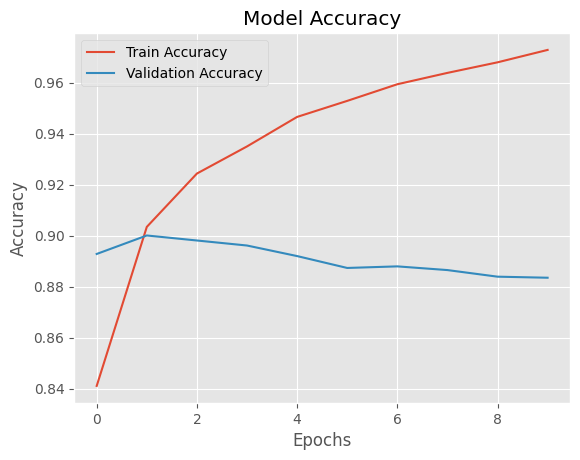

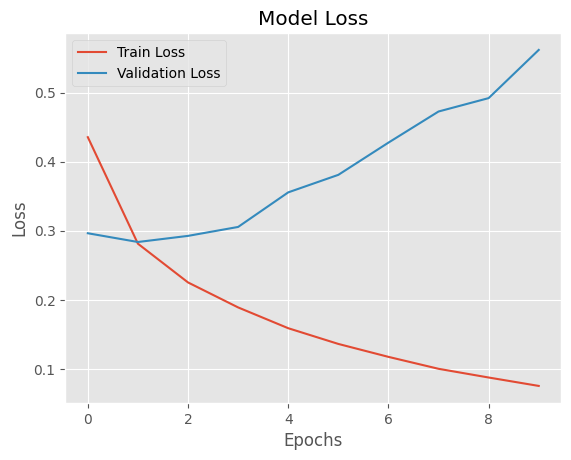

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Assuming max_vocab_size and max_sequence_length are already defined
embedding_dim = 300
vocab_size = min(max_vocab_size, len(word_index) + 1)

# Define the model
model = Sequential()
model.add(Input(shape=(max_sequence_length,)))

# Embedding layer (trained from scratch)
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_sequence_length,
                    trainable=True))  # Set trainable to True to learn embeddings

# Add spatial dropout for regularization
model.add(SpatialDropout1D(0.2))

# Bidirectional LSTM layers with reduced units
model.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)))

# Dense layer with L2 regularization and output
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 300)            │       4,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_5                  │ (None, 100, 300)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 100, 128)            │         186,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,732,707 (18.05 MB)

 Trainable params: 4,732,579 (18.05 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau



early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=64,  # Adjust based on hardware
                    epochs=5,  # Adjust based on performance
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/5
  1/606 ━━━━━━━━━━━━━━━━━━━━ 13:29 1s/step - accuracy: 0.9531 - loss: 0.1280